<h1>以爬蟲爬取PTT CVS版(超商版) 並針對全家與7-11進行商品銷售分析</h1>

<h2>Part1. 爬蟲 爬取PTT CVS版的近期文章</h2>

<h3>爬取並建立包含"文章標題與對應網址"的Data Frame</h3>

In [1]:
# Import基本套件
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pyquery import PyQuery as pq
import re
import matplotlib.pyplot as plt
%matplotlib inline

titles=[]
urls=[]

url = "https://www.ptt.cc/bbs/CVS/index.html"

for i in range(40): #往上爬40頁
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    sel = soup.select("div.title a") #標題
    for s in sel:
        title=s.text
        url_temp="https://www.ptt.cc/"+s["href"]
        titles.append(title)
        urls.append(url_temp)
    u = soup.select("div.btn-group.btn-group-paging a") #a標籤
    #print ("本頁的URL為"+url)
    url = "https://www.ptt.cc"+ u[1]["href"] #上一頁的網址


dic={"titles":titles,"urls":urls}
df=pd.DataFrame(dic)
df #這是包含所有爬取下來的"文章標題與對應網址"的Data Frame

,titles,urls
0,[問題] 全家鮮奶茶是不是下架了？,https://www.ptt.cc//bbs/CVS/M.1561873015.A.C66...
1,[商品]萊爾富 小美黑糖珍奶雪糕,https://www.ptt.cc//bbs/CVS/M.1561874450.A.877...
2,[商品] 711 寶咖咖普羅旺斯烤雞口味,https://www.ptt.cc//bbs/CVS/M.1561881632.A.D9C...
3,[贈送] 極速領域 手遊虛實序號,https://www.ptt.cc//bbs/CVS/M.1561882460.A.D1E...
4,[問題] 萊爾富 雲端超商穩不穩,https://www.ptt.cc//bbs/CVS/M.1561882649.A.37C...
5,Re: [情報] line酷券 全家霜淇淋2枝60元,https://www.ptt.cc//bbs/CVS/M.1561882661.A.8FA...
6,[商品] 全家 媽媽煮藝-東山綜合滷味＆鮮筍雞燉湯,https://www.ptt.cc//bbs/CVS/M.1561883629.A.C17...
7,[商品] 全家-光泉-黃金比例 豆米漿,https://www.ptt.cc//bbs/CVS/M.1561887515.A.9E2...
8,[商品] 全家 墨西哥葡萄奶酥麵包,https://www.ptt.cc//bbs/CVS/M.1561888829.A.F61...
9,[商品] OK 黑糖仙草凍,https://www.ptt.cc//bbs/CVS/M.1561889579.A.971...


<h3>再整理出分類為"商品"的文章</h3>

In [2]:
# 這是"商品"的文章們
titles2 = []
urls2 = []

for i in range(0,len(df)):
    title2 = df.iloc[i,0]
    url2 = df.iloc[i,1]
    if title2[1:3] == "商品":
        titles2.append(title2)
        urls2.append(url2)
        
dic2 = {"titles":titles2,"urls":urls2}

df2 = pd.DataFrame(dic2)
df2         


,titles,urls
0,[商品]萊爾富 小美黑糖珍奶雪糕,https://www.ptt.cc//bbs/CVS/M.1561874450.A.877...
1,[商品] 711 寶咖咖普羅旺斯烤雞口味,https://www.ptt.cc//bbs/CVS/M.1561881632.A.D9C...
2,[商品] 全家 媽媽煮藝-東山綜合滷味＆鮮筍雞燉湯,https://www.ptt.cc//bbs/CVS/M.1561883629.A.C17...
3,[商品] 全家-光泉-黃金比例 豆米漿,https://www.ptt.cc//bbs/CVS/M.1561887515.A.9E2...
4,[商品] 全家 墨西哥葡萄奶酥麵包,https://www.ptt.cc//bbs/CVS/M.1561888829.A.F61...
5,[商品] OK 黑糖仙草凍,https://www.ptt.cc//bbs/CVS/M.1561889579.A.971...
6,[商品] 全家 茶本淨-有機洋甘菊茶,https://www.ptt.cc//bbs/CVS/M.1561891563.A.FF4...
7,[商品] 7-11皮蛋瘦肉粥,https://www.ptt.cc//bbs/CVS/M.1561894962.A.343...
8,[商品] 全家 OREA拿鐵冰沙,https://www.ptt.cc//bbs/CVS/M.1561901107.A.FC7...
9,[商品] 7-11獨賣 黑松沙士Plus啤酒花風味,https://www.ptt.cc//bbs/CVS/M.1561901777.A.CF3...


<h3>定義函數 : 這些函數分別為"取得文章中的產品、商家、分數、心得與留言"</h3>

In [3]:
# 這是取得產品內文的function
def getProduct(url:str) -> str:
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    str_soup = str(soup)

    x = str_soup.find("【商品名稱/價格】：")
    y = str_soup.find("\n",x)
    
    return str_soup[x+10:y]

# 這是取得商家內文的function
def getStore(url:str) -> str:
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    str_soup = str(soup)
    
    x = str_soup.find("【便利商店/廠商名稱】：")
    y = str_soup.find("\n",x)
    
    return str_soup[x+12:y]

# 這是取得分數的function
def getScore(url:str) -> int:
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    str_soup = str(soup)
    
    x = str_soup.find("【評分】：")
    y = str_soup.find("【心得】",x)
    score = re.findall(r"\d+\.?\d*",str_soup[x+5:y])
    
    return int(score[0]) if int(score[0]) == 0 or int(score[0]) >= 10  and int(score[0])<=100 else None


# 這是取得心得的function
def getContent(url:str) -> str:
    
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    str_soup = str(soup)

    x = str_soup.find("id=\"main-content\">")
    y = str_soup.find("【心得】：",x)
    z = str_soup.find("--",y)    
    result = str_soup[y+5:z]
    result = result.replace("\n"," ").replace("\n","")

    div = "</div>"
    a = "<a"
 
    while a in result:
        a_index = result.find(a)
        d_index = result.find(div,a_index)
        result = result[:a_index] + result[d_index+6:]
    
    return result

# 這是取得留言的function
def getComment(url:str) -> list:

    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    sel = soup.select("span.f3")
    temp = []
    
    for i,s in enumerate(sel):
        if i % 2 == 1:
            temp.append(s.text[2:])
            
    return temp
    


<h3>透過上面爬蟲建立的Data Frame與自定義函數，開始建立資料整理過後的Data Frame</h3>

In [4]:
# 創建整理過資料後的 DataFrame
titles = []
prods = []
stors = []
scors = []
conts = []
comms = []
pd.set_option('display.max_row', None)

#只將完整的資料加入Data Frame
#也就是若某筆資料有缺值，則會將該筆資料全部忽略

for i in range(0,len(df2)):
    
    try:
        url = df2.iloc[i,1]
        title = df2.iloc[i,0]
        prod = getProduct(url)
        stor = getStore(url)
        scor = getScore(url)
        cont = getContent(url)
        comm = getComment(url)
        
    except:
        continue
        
    titles.append(title)
    prods.append(prod)
    stors.append(stor)
    scors.append(scor)
    conts.append(cont)
    comms.append(comm)
        
dic_={"title":titles,"product":prods,"store":stors,"score":scors,"content":conts,"comment":comms}
df_=pd.DataFrame.from_dict(dic_, orient='index')

df_=df_.transpose()
df_



,title,product,store,score,content,comment
0,[商品]萊爾富 小美黑糖珍奶雪糕,小美黑糖珍奶雪糕/30元(第二件5折),萊爾富,75,版上風評不錯的冰，今天也買了一支來嚐鮮。 回到家吃了一口，已經開始變軟了。(融化的很快，...,"[ (未滿60分為不推薦), 好吃又過癮~融化太快是唯一敗筆...!, 超好吃..."
1,[商品] 711 寶咖咖普羅旺斯烤雞口味,寶咖咖普羅旺斯烤雞口味,711,85,其實原味寶咖咖就已經很好吃 不過這次跟拿坡里聯名的口味我也覺得很好吃 整體就很...,"[ (未滿60分為不推薦), 還不錯吃，但偏鹹]"
2,[商品] 全家 媽媽煮藝-東山綜合滷味＆鮮筍雞燉湯,東山綜合滷味/NT42 鮮筍雞燉湯/NT55,全家,75,網誌： 早就想要試試看媽媽煮藝的餐點，因為趕著要上課又一個人在家...,"[ (未滿60分為不推薦), 湯裡的凍狀物是額外添加明膠 這樣才不會把湯裡的料..."
3,[商品] 全家-光泉-黃金比例 豆米漿,黃金豆米漿 /單入嚐鮮19元,全家 / 光泉,75,打開聞到就是米漿的味道 甜度我覺得跟米漿差不多 入口後有淡淡的豆味跑出來 還滿可以接受的...,"[max, unghan, night]"
4,[商品] 全家 墨西哥葡萄奶酥麵包,墨西哥葡萄奶酥麵包/25元（友善價18元）,全家,65,因為麵包外面那一圈感覺好像很好吃 我喜歡咬那一片的感覺 基本上就像外面賣的奶酥麵包一樣...,"[ (未滿60分為不推薦), 友善價回到小時候的價格了, 討厭葡萄乾我都買71..."
5,[商品] OK 黑糖仙草凍,黑糖仙草凍35元（即期價21元）,OK,90,雖然它是即期六折價 但七月底才到期當然就買了 開的時候要小心 汁多一定噴，我大概吸了三口...,"[ (未滿60分為不推薦), 這個好吃會買回家加牛奶, 剛剛很猶豫的在ok看了..."
6,[商品] 全家 茶本淨-有機洋甘菊茶,茶本淨 草本舒壓-有機洋甘菊茶（28元）,全家/金車,85,最近再宿舍附近的全家尋找新產品嚐嚐鮮 這瓶甘菊茶喝起來不會苦 有一股淡淡的菊花味 ...,"[好像是金車的，博士茶也好喝, 是金車的，我補一下, 哦，我有心動耶, 無糖生火]"
7,[商品] 7-11皮蛋瘦肉粥,皮蛋瘦肉粥/55元,7-11,70,開封時只有唯一心得，就是外膜也太難撕開完全撕不開天哪崩潰！！！最後拿 出鑰匙刺破才能順利進食...,"[ (未滿60分為不推薦), 所以你是病人？, 冬天早上很愛吃這個, 病人??..."
8,[商品] 全家 OREA拿鐵冰沙,特價39元,全家,99,特價最後一天才買到，真的頗好喝，可以吃到碎碎的OREA巧克力，看是要咬或直接喝下去 也ok...,"[ (未滿60分為不推薦), OREA是鍾漢良的特別版嗎!, https://..."
9,[商品] 7-11獨賣 黑松沙士Plus啤酒花風味,黑松沙士Plus啤酒花風味 / 35元,7-11獨賣,75,老品牌黑松沙士Plus系列繼之前和咖滋爆米花合作後又有最新作品了，這次feat.臺虎 精...,[]


<h2>Part2. 分別針對全家與7-11進行整體商品評價分析</h2>

<h3>首先，先將上面的Data Frame根據"商家"的欄位拆分出"全家"與"7-11"的Data Frame</h3>

<h3>全家的DataFrame</h3>

In [5]:
# 創建"全家"的 DataFrame
df_family = pd.DataFrame()
for i in range(0,len(df_)):
    if "全家" in df_.iloc[i,2]:
        df_family = df_family.append(df_.iloc[[i]])
df_family

,title,product,store,score,content,comment
2,[商品] 全家 媽媽煮藝-東山綜合滷味＆鮮筍雞燉湯,東山綜合滷味/NT42 鮮筍雞燉湯/NT55,全家,75,網誌： 早就想要試試看媽媽煮藝的餐點，因為趕著要上課又一個人在家...,"[ (未滿60分為不推薦), 湯裡的凍狀物是額外添加明膠 這樣才不會把湯裡的料..."
3,[商品] 全家-光泉-黃金比例 豆米漿,黃金豆米漿 /單入嚐鮮19元,全家 / 光泉,75,打開聞到就是米漿的味道 甜度我覺得跟米漿差不多 入口後有淡淡的豆味跑出來 還滿可以接受的...,"[max, unghan, night]"
4,[商品] 全家 墨西哥葡萄奶酥麵包,墨西哥葡萄奶酥麵包/25元（友善價18元）,全家,65,因為麵包外面那一圈感覺好像很好吃 我喜歡咬那一片的感覺 基本上就像外面賣的奶酥麵包一樣...,"[ (未滿60分為不推薦), 友善價回到小時候的價格了, 討厭葡萄乾我都買71..."
6,[商品] 全家 茶本淨-有機洋甘菊茶,茶本淨 草本舒壓-有機洋甘菊茶（28元）,全家/金車,85,最近再宿舍附近的全家尋找新產品嚐嚐鮮 這瓶甘菊茶喝起來不會苦 有一股淡淡的菊花味 ...,"[好像是金車的，博士茶也好喝, 是金車的，我補一下, 哦，我有心動耶, 無糖生火]"
8,[商品] 全家 OREA拿鐵冰沙,特價39元,全家,99,特價最後一天才買到，真的頗好喝，可以吃到碎碎的OREA巧克力，看是要咬或直接喝下去 也ok...,"[ (未滿60分為不推薦), OREA是鍾漢良的特別版嗎!, https://..."
12,[商品] 全家 炸雞腿木桶油飯,炸雞腿木桶油飯/原價70元（友善價49元）,全家,60,先說一下我從沒吃過便利商店的油飯 但看到這篇文章 心想莫非是驚為天人的好吃 於是今天就...,"[ (未滿60分為不推薦), 沒熟透應該是微波不夠久, 不得不說… 這款油飯的..."
13,[商品] 全家 咔辣姆久厚切椒麻雞,咔辣姆久厚切椒麻雞/35元,全家/湖池屋,70,沒試過椒麻雞口味買來試試，一拆包就聞到濃濃的檸檬味，吃起來因爲是厚切，口感紮實 但偏酸，微...,"[ (未滿60分為不推薦), 我蠻喜歡的耶 味道蠻重的, 我也覺得普通 太鹹 ..."
14,[商品] 全家 摩卡可可脆片泡芙,摩卡可可脆皮泡芙 42元,全家,81,全家打7折真的好吸引我啊 每次都會晃晃看有什麼打折了 這款沒看過 不知是新品嗎 有點甜 ...,"[ (未滿60分為不推薦), 這個好吃,看到7折會一直回購XD, 另外還有款巧..."
17,[商品] 全家 奶油蕃茄培根生義大利麵,奶油蕃茄培根生義大利麵/85元,全家,85,"上次看到版上有人在問全家好吃的微波食品 滿多人推薦這款 就買來吃吃看了 配料有花椰菜,培根...","[78112, dama, dama, 223131928, perFM, an0313, ..."
20,[商品] 全家懷舊五香滷排骨便當,79,全家,60,前幾天去三峽老街吃了美味的懷舊排骨飯 最近整個人都想懷舊一下 今天午餐時間在全家看到這款排...,"[排骨好吃!, 為什麼可以拍的那麼難吃..., 最近也吃了一次，79不如去便當店買排骨飯，菜..."


<h3>7-11的Data Frame</h3>

In [6]:
# 創建"7-11"的 DataFrame
df_seven = pd.DataFrame()
for i in range(0,len(df_)):
    if ("7-11" in df_.iloc[i,2]) or ("711" in df_.iloc[i,2]):
        df_seven = df_seven.append(df_.iloc[[i]])
df_seven

,title,product,store,score,content,comment
1,[商品] 711 寶咖咖普羅旺斯烤雞口味,寶咖咖普羅旺斯烤雞口味,711,85,其實原味寶咖咖就已經很好吃 不過這次跟拿坡里聯名的口味我也覺得很好吃 整體就很...,"[ (未滿60分為不推薦), 還不錯吃，但偏鹹]"
7,[商品] 7-11皮蛋瘦肉粥,皮蛋瘦肉粥/55元,7-11,70,開封時只有唯一心得，就是外膜也太難撕開完全撕不開天哪崩潰！！！最後拿 出鑰匙刺破才能順利進食...,"[ (未滿60分為不推薦), 所以你是病人？, 冬天早上很愛吃這個, 病人??..."
9,[商品] 7-11獨賣 黑松沙士Plus啤酒花風味,黑松沙士Plus啤酒花風味 / 35元,7-11獨賣,75,老品牌黑松沙士Plus系列繼之前和咖滋爆米花合作後又有最新作品了，這次feat.臺虎 精...,[]
15,[商品] 7-11 龍鳳炭火燒肉包,龍鳳炭火燒肉包/35元,7-11/龍鳳,90,觀望很久，今天給他一個機會，沒想到很好吃！有烤肉味，肉很多，而且甜甜 的，符合我台南人口味，...,"[g990999, pan, 0525025, venant, sako, nica5286..."
16,[商品] 7-11泰式紅咖哩,泰式紅咖哩 70元,7-11,85,封面- 裡物- 這是7-11新發的產品，紅色是蝦醬調出。 跟綠比起來味道比較平一點，...,"[10216, ukino, vin0608, gc, PM, 7071220, yu, r..."
19,[商品] 7-11森永嗨啾薄荷冰球（萊姆口味）,森永嗨啾薄荷冰球（萊姆口味/30元,7-11/森永,85,口感很像小時候會吃的您可吞軟糖 球狀吃起來比曼陀珠更有口感也沒那麼硬 吃起來有淡淡的檸檬香...,[ntian]
23,[商品] KIRIN冰結水果調酒【巨峰葡萄】,KIRIN 冰結水果調酒巨峰葡萄,7-11/KIRIN,87,前年喝過的一隻九趴系列水果調酒，日本斷片系調酒之一，期待了一年終於又再次上市， 開罐之後...,"[nyi, nyi, nyi, nyi, nyi, nyi, nyi, nhom88, nh..."
29,[商品] 7-11 黑糖冬瓜珍珠,7-11 黑糖冬瓜珍珠 / 55元,7-11,75,平常都會自己泡黑糖水， 看到7-11出了黑糖冬瓜珍珠就來喝一下看看～ 我不是螞蟻人，飲...,"[ (未滿60分為不推薦), 再啦乾, 再回購, 再啦吼, 可是我是螞蟻人 我..."
31,[商品] 7-11草莓鮮奶茶,草莓鮮奶茶/38元（搭配早餐省10元）,7-11,65,喝起來水水的，不像奶茶也不像草莓牛奶，而且草莓味跟我熟悉的草莓味不一樣，還 莫名的...,"[ (未滿60分為不推薦), 真有緣，同時 寫這個商品, 好有緣, 樓下的草莓..."
32,[商品] 7-11 HIS 純黑咖啡,HIS 純黑咖啡/30元,7-11,80,平常每天早上都會喝公司咖啡醒腦 最近在7-11看到一款以男性為主的咖啡 好像有人有說...,"[, yun51, XXGIRLS, nnwe, gbo, ki1010101, ngOfT..."


<h3>分析"全家"整體的分數表現，建立直方圖</h3>

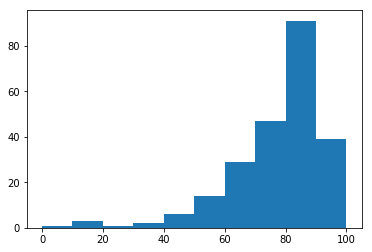

In [7]:
#去除全家商品沒分數的項目,做成直方圖
df_family_score = pd.DataFrame()
for i in range(0,len(df_family)):
    score = df_family.iloc[i,3]
    if score is not None:
        df_family_score = df_family_score.append(df_family.iloc[[i]])
plt.hist(list(df_family_score.iloc[:,3]))
plt.show()

<h3>觀察全家品項中分數"小於等於40分"的商品有哪些</h3>

In [8]:
pd.set_option('max_colwidth',1000)
df_family_score[df_family_score.iloc[:,3]<=40]


,title,product,store,score,content,comment
70,[商品] 全家 彈珠汽水霜淇淋,彈珠汽水霜淇淋/app預售32元/支,全家,40,"不囉嗦 先上圖 是我愛的藍色 跑了第一家全家，機器清潔中 到一家沒去過的，緊張中～ 結果居然是我們拿到過算大支的 店員拿給我們時 說：不好意思 擠很醜 我OS: 沒關係 大支比較重要 但是....... 大支沒用 好吃才有用啊..... 吃起來覺得有點像藥水味？漱口水味？ 吞下去那瞬間居然有點噁心？ 大概吃這樣我就不想吃了@@ 好膩.... 灌好幾口無糖茶 有吃過的圖 慎入！ . . . . . . . . 有點後悔被仙女奶茶雷到後沒吃仙女紅茶霜淇淋了 Sent from JPTT on my iPhone <span class=""f2"">※ 編輯: womandddd (101.14.225.242 臺灣), 06/21/2019 21:25:12 </span><div class=""push""><span class=""hl push-tag"">推 </span><span class=""f3 hl push-userid"">ttcml</span><span class=""f3 push-content"">: 仙女紅茶就是好吃的奶茶味，可惜了</span><span class=""push-ipdatetime""> 06/22 00:11 </span></div><div class=""push""><span class=""f1 hl push-tag"">→ </span><span class=""f3 hl push-userid"">womandddd</span><span class=""f3 push-content"">: 沒有了QQ 應該也不會重出江湖了吧...</span><span class=""push-ipdatetime""> 06/22 00:17 </span></div><div class=""push""><span class=""f1 hl push-tag"">→ </span><span class=""f3 hl push-userid"">bigperm</span><span class=""f3 push-content"">: 仙女紅茶好吃，我也好想念QQ</span><span class=""push-ipdatetime""> 06/22 13:38 </spa...","[仙女紅茶就是好吃的奶茶味，可惜了, 沒有了QQ 應該也不會重出江湖了吧..., 仙女紅茶好吃，我也好想念QQ, 下次換口味前也許會有？, 覺得就是檸檬汽水的味道~很喜歡]"
75,[商品] 全家 森永質上雪糕（牛奶糖風味）,全家 森永PREMIUM ICE BAR質上雪糕（牛奶糖風味）,全家/森永,10,看到外盒就覺得可能很甜 外皮很脆 敏感性牙齒請勿輕易嘗試 關於吃的心得只能給它兩個字 「甜爆」 抱歉，真的甜爆了 不是螞蟻人請勿輕易嘗試 一口就決定放棄 跟家人交換彈珠汽水霜淇淋吃 （不過彈珠汽水霜淇淋被嫌棄難吃，家人認為雪糕神好吃的）,"[, 我也覺得這款好吃XD, 好吃+1, 覺得好吃+1 XD~, 好吃!, 很甜但蠻好吃, 之後會有優惠活動, 覺得好吃+3000, 超好吃 覺得皮很甜但雪糕本體沒那麼甜 吃起來有中和, 超喜歡好吃～]"
117,[商品] 全家 舒芙蕾布丁,舒芙蕾布丁/48元,全家,10,剛剛滿懷期待的買了一個舒芙蕾布丁，結 果一吃真的是驚為天人！底下焦糖是苦 的......真的是超級苦的那種......有圖有真相,"[ok18ies, ennnnnn, rchata, 76258, bywin, genebaby, b, greenair, dfgh222, dfgh222, e0404, hagogo123, n0513]"
190,[商品] 全家 不持久的德國boy 防風晴雨傘,德國boy防風晴雨傘/399元,全家,10,剛買用時就有點異常。 傘撐起來後，有時候抖動一下，就軟了(X) 卡榫就鬆掉了(O)。 之後發生的頻率越來越高。 每走幾步路，或是風大一點，就要再重新撐傘。 gif動圖示範:(網頁版可正常播放),"[ilan, b, b, rutodante, riomaurer, runrundela, mmica33, ]"
218,[商品] 全家 德國boy自動傘,德國boy自動傘/499元,全家,0,史上最破的傘 雖然雨真的很大 但要傘內外一樣濕 也真的是很不簡單 水一直滴一直滴 撐到頭很濕 還花了我499 不如去買濾網,"[XD, 可撥, XD, 傘布做到會漏水還真是新鮮, XDDDDDD, 0分 XDDDD, 雙濕牌, 馬的還好沒買, 笑了 便利商店可拋棄式傘也沒這麼爛, 真的是雨傘 會自己下的那種(′・ω・`)..., 拍拍 好糟糕的傘, 這牌子有粉專 可以私訊反應看看, 拍拍你, 買過這牌子的傘,用不到一個月傘骨就斷了, 後來查一下,對岸有人提到:boy、kobold是大陸品牌洋包裝, 同情推, 感受到原po的怒氣, 雙濕牌, 這一定不是德國做的......, 去年板上有人是傘骨斷#1Rm8oDA5, 更正，是傘桿斷, 家裡有黑珍珠的話等傘乾了噴一噴傘面還有救, 70元的直傘都比這好..., 拍拍XD, 感謝您拍拍, 不如買透明傘, 100元傘也沒那麼差會漏水, 499………………………, 笑死XDD, 哈哈哈謝謝分享, 謝謝分享, 應景推，不要踩雷, 要買這不如買天堂傘，但只能網訂@@"", 我在德國當地藥妝店隨便買一把也才台幣150元不到，雖然, 不是自動傘，但品質超好的。, 感謝犧牲, 最後一句笑噴XDD 原po拍拍, 想幫原PO拍拍，但好好笑XDD, 拍拍, 原來這個也有評分, 拍拍，感受到原po強烈的怒氣, XDD 之前買過一把 撐蠻久的，但有次用完忘記晾乾發霉 只, 好丟掉, XDD, 我買很花的一把什麼都市傘用得算滿意, 最後一句笑死 幫拍拍QQ, 之前買一把99的摺傘，用了兩年XD, XDD, 讚 評論我喜歡, 好慘, 0分wwwwww, 國軍雨衣, 我笑了XDDD, 0分都嫌多, 而且它很重，買來沒多久就轉賣^^, 忍住笑 幫你拍拍, 499.....拍拍, 被濾網戳到笑點, 有滿滿的怨念！感謝犧牲！, 根本詐騙, 可能吊牌有寫請勿淋雨, 這也太扯了 幫原po拍拍, 499………不忍笑尼, 好瞎, 有夠衰 499, 真的0分 我在機場買帶去中國出差 在中國一撐傘骨就斷 乾, 原PO拍拍......雖然我大笑了XD, 真的雙濕 幫QQ, XD, 幫QQ 透明直傘都比這個好XDD, 以前在全家買傘也是 大雨天就斷, 才買不到10分鐘 且只是夏天大雨, 499幫QQ 我現在學乖了都只買100上下的傘, 濾網www, 大陸商店買12元rmb 都比他強多了, https://img.udn.com/image/product/S0004990/201801..."
280,[商品] 全家大口飯糰-糖醋雞丁,大口飯糰 糖醋雞丁/45元/7折$32,全家,40,（抱歉忘記拍照了） 托全家友善食光活動的福，最近吃了很多種以往不會買來吃的商品 但這款我覺得應該叫豆芽飯糰 吃到豆芽的印象遠比糖醋雞丁的來得高 40分給32元買個飽足感 應該是不會再回購了,"[""托”…!, 有糖醋的酸味但又不會太過 調味來說還不錯]"
339,[商品] 全家 墨西哥藍莓辮子,全家 墨西哥藍莓辮子,全家,20,五告拍家 今天是歡樂禮拜五 想說可以來爆個碳 就走進全家挑麵包 本來想買大家都推的起司熔岩什麼的 但38有點讓我買不下去(抖 於是就拿了隔壁貼著好食光的藍莓辮子去結帳 結果好後悔喔... 就是白麵包上面塗一層藍莓醬 完全不知道墨西哥在哪裡 吃兩口就完全不想吃 於是把上面藍莓全咬掉剩下的那去施肥了... 那個白麵包...我還以為自己在吃金立方呢 35塊 你有更好的選擇 真的,"[https://i.imgur.com/XJGtLzc.jpg, 補個沙龍照, 還好啦，只是很無聊而已, 不好吃+1, 剛吃了一個 滿爛的, 我個人還蠻喜歡金立方的, 不太了解墨西哥麵包是什麼意思？！, 金立方超難吃, 金立方真的很難吃XDDD 勾起了可怕的回憶, 手撕蒜也不值, 麵包口感還滿紮實的 藍莓醬也不會太甜還ok]"
402,[商品] 全家/野郎炙燒牛,野郎炙燒牛/49（原價69元友善食光打7折）,全家,40,之前看到板上有人說洋蔥很硬 不信邪的我看到打7折就想說買來吃看看 哦天啊！真的很硬 都要懷疑他是不是真的有煮過 看到的真的就是他全部的料 個人覺得很少 原價買的話我大概會很生氣xD 上面的紅色粉有一點點辣 醬很甜 吃完完全沒有飽足感 總之超級不推 看到七折還是別嘗試吧,"[nguo, 10216, tie78, l0716, urettane, dee, ssy]"
426,[商品] 全家 焦糖蘋果起司厚片,焦糖蘋果起司厚片/42元,全家,30,今天去全家看到這個應該是新品，有點興趣，就順手帶回家。 第一次吃這種微波的吐司產品，吐司邊很難嚼也沒有該有的香氣，不知道是本來就這樣還 是這個產品的問題。 四周的麵包體醬料比較少幾乎沒什麼味道，靠中間才吃的到蘋果粒。 說是蘋果起司，但其實起司只有正中間那塊，整個麵包只有正中間有起司有蘋果粒的時候 才有存在感，其他我都不知道在吃什麼。 42元我寧可

<h3>再觀察全家品項中分數為"100分"的商品有哪些</h3>

In [9]:
#全家獲得100分好評的商品!!
df_family_score[df_family_score.iloc[:,3]==100]

,title,product,store,score,content,comment
327,[商品] 全家 熔岩起司麵包,全家 熔岩起司麵包/35元 搭配套餐49/59,全家,100,外型有點像布丁麵包 加熱後上面的起司融化 切開後麵包裡面有高熔點乳酪 分佈在麵包裡面 雖然不是超級多 但是因為上面有一層起司所以每一口都吃得到起司！ 麵包也不會很乾 起司加熱後也沒有讓整個麵包油膩膩的 鹹度也剛好 超級好吃！！一定要加熱！ 而且熱量異常的低～ 搭配49套餐覺得超划算～,"[nderchou, ckcalb, ttmann, dc, totw, g990999, 2639588, by0912, by0912, hotu, iketoeat, b, 507876, nceTsai, jeanyage, n78525, ykm, ror123, dialove, totw, o39, K2, rthperson, ndagn, rt, yuyu, xanneC, 2012, tin1249, onajuna, suzuXD, XXDICK, lenk, ey28, urettane, f20xx, f20xx, ll0314, nic, hiucn, totw, totw, eun421, utica1983, untin36, nflower, PA5278, fconk, fconk, rchata, tlessly]"


<h3>分析"7-11"整體的分數表現，建立直方圖</h3>

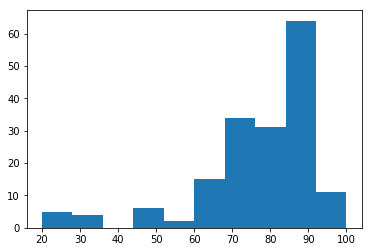

In [10]:
#去除711商品沒分數的項目
df_seven_score = pd.DataFrame()
for i in range(0,len(df_seven)):
    score = df_seven.iloc[i,3]
    if score is not None:
        df_seven_score = df_seven_score.append(df_seven.iloc[[i]])
plt.hist(list(df_seven_score.iloc[:,3]))
plt.show()

<h3>觀察7-11品項中分數"小於等於40分"的商品有哪些</h3>

In [11]:
df_seven_score[df_seven_score.iloc[:,3]<=40]

,title,product,store,score,content,comment
156,[商品] 丸龜製麵胡麻嫩雞冷烏龍,,7-11/陸仕,20,醬非常難吃，是甜的， 而且很甜像糖漿， 麵就烏龍麵而已， 20分是給雞肉的加的,"[ (未滿60分為不推薦), 醬不OK+1, 不喜歡醬+1, 真的難吃, 我覺得好吃, 我覺得超好吃欸, 千萬別把那坨鮪魚加下去！！, 這款我反而比較喜歡麵體和醬，麵很Q，肉覺得還好, 鮪魚我是放旁邊當配菜吃, 鮪魚當配菜吃會比較好, 算好吃，看個人，那團鮪魚是不是走錯棚？, 醬超級難吃+1, 我竟然把它吃光了!!? God.., 我覺得好吃欸吃三次了, 很喜歡醬耶 吃五次了, 我也喜歡吃耶！可是最近都找不到，請問是不是快下, 架了？, 醬真的不ok 如果醬改成日式胡麻口味我覺得比較適合, 醬超難吃+1 搭配鮪魚也很跳痛, 超級甜 還沒什麼胡麻味, 是嘉義涼麵的味道XDDDD 個人滿喜歡的, 我是愛 比那個九面推薦的好吃多了, 我很喜歡，回購多次了!, 很喜歡+1 看來很看人, 這評價也太兩極XD, 覺得醬味道怪怪的～, 這太兩極了吧XD, 超愛！回購超多次！超愛這個醬]"
181,[商品] 7-11 鋒味-港式風味鴛鴦奶茶,鋒味-港式風味鴛鴦奶茶/39元,7-11/鋒味,30,喝第一口就傻眼，還以為是我沒搖均勻立刻蓋上瓶蓋搖一搖再喝 跟我印象中的鴛鴦奶茶...... 咖啡味極淡，無論是用聞的還是用喝的都是 奶味跟茶味也都淡到不行 大概是餐廳裡的鴛鴦奶茶上半部跟冰塊溶掉一半混合之後的感覺 可惜了我對鋒味涼麵的印象還蠻好的QQ,"[488663, 488663, stree, ainan, AJA, eirred, 10216, alleswell, gustsixth, 74532087]"
241,[商品] 7-11 波的多洋芋片 鳳梨蝦球&椒鹽溪蝦,波的多洋芋片鳳梨蝦球、椒鹽溪蝦 / 都25，第二件6折共40,"tml>\n\n<html>\n<head>\n<meta charset=""utf-8""/>\n<meta content=""width=device-width, initial-scale=1"" name=""viewport""/>\n<title>[商品] 7-11 波的多洋芋片 鳳梨蝦球&amp;椒鹽溪蝦 - 看板 CVS - 批踢踢實業坊</title>\n<meta content=""all"" name=""robots""/>\n<meta content=""Ptt BBS 批踢踢"" name=""keywords""/>\n<meta content=""【商品名稱/價格】：波的多洋芋片鳳梨蝦球、椒鹽溪蝦 / 都25，第二件6折共40\n (區域型商品請註明 試吃試用品請標示價格0元)\n【規格/內容物/熱量】：54g/307大卡、54g/302大卡\n【評分】：鳳梨蝦球20分、椒鹽溪蝦55分\n (未滿60分為不推薦)\n"" name=""description""/>\n<meta content=""Ptt 批踢踢實業坊"" property=""og:site_name""/>\n<meta content=""[商品] 7-11 波的多洋芋片 鳳梨蝦球&amp;椒鹽溪蝦"" property=""og:title""/>\n<meta content=""【商品名稱/價格】：波的多洋芋片鳳梨蝦球、椒鹽溪蝦 / 都25，第二件6折共40\n (區域型商品請註明 試吃試用品請標示價格0元)\n【規格/內容物/熱量】：54g/307大卡、54g/302大卡\n【評分】：鳳梨蝦球20分、椒鹽溪蝦55分\n (未滿60分為不推薦)\n"" property=""og:description""/>\n<link href=""https://www.ptt.cc/bbs/CVS/M.1560006241.A.A60.html"" rel=""canonical""/>\n<link href=""//images.ptt.cc/bbs/v2.26/bbs-common.css"" rel=""stylesheet"" type=""text/css""/>\n<link href=""//images.ptt.cc/bbs/v2.26/b...",20,"鳳梨蝦球：包裝一打開聞滿滿蝦味衝上、但吃起來卻毫無蝦味， 滿滿的鳳梨味，而且是鳳梨酥的鳳梨味， 還混有大賣場獨特的冰箱味... (有點難形容總之就是在家樂福生鮮區會聞到的那種味道) 回購率：0% 椒鹽溪蝦：比鳳梨蝦球好吃一點，五香、胡椒、蝦味交纏在一起 有吃過烤蝦或鹽焗蝦的應該會感到驚艷，因為他連<span class=""f3 hl"">蝦殼烤焦的味道</span> 都還原了。不過吃久會覺得還滿化工的...建議吃個幾片就好 回購率：20% 每次休閒零食出新創意口味就會忍不住買來試，番茄好像有點普通就先買這兩款了 雖然還是失望不過比上次那個豬血糕好啦...","[烤焦的味道, 看樣子最好吃的是最不起眼的醬油蕃茄...我還蠻喜歡的, 鳳梨蝦球真的超難吃QQ, 此兩款吃了真心懷疑入口到底是什麼 沒吃完就丟了, 好家在沒買呵呵!(竊笑, 喜歡真的鳳梨蝦球，但這口味的敘述看起來感覺好可怕XD, 化工洋芋片, 這種口味..滅火, 廣仲還是適合吃早餐, 宵夜可能不常吃~, 感覺糟糕, 蝦球口味真的不行 踩到雷, 番茄醬油意外的好吃, 謝謝掃雷, 鳳梨蝦球真的超鳳梨酥XDDD, 這包裝 滅火, 還好今天想了三秒鐘後沒買XDD, 番茄醬油好吃, 今天買了溪蝦，我覺得還可以！, 鳳梨酥味道感覺母湯 感謝掃雷, 今天買了溪蝦，超鹹的，連重口味的我都不行。, 番茄醬油的好吃, 感謝滅火, 兩種超難吃，椒鹽蝦有種消毒水味, 感謝滅火, 兩種都很難吃]"
251,[商品] 7-11烤雞番茄白醬意大利麵,烤雞番茄白醬意大利麵/$85 深夜時段搭配指定商品第二件85折,7-11/聯華食品,20,這位好像是新同學就點這位的檯當宵夜 殊不知是不中看也不中吃的開端（泣 裡面唯二能上檯面的就是麵體跟蔬菜 麵體是我喜歡的偏硬口感（10分） 蔬菜青花菜跟玉米筍脆度還在真是阿彌陀佛（10分） 鴻禧菇雖然沒出包但不知道為什麼就覺得它走錯棚XD 番茄味來自裡面唯一的番茄塊然後就完全沒有任何味道惹！！！！ 白醬該有的奶油味完全沒出現 第一口到結束就像感冒喪失味覺在吃東西一樣 烤雞在架上的時候我一度以為它是鯊魚煙... 雞肉超級乾無敵柴只有上面撒的迷迭香味道 $85買這盤我真盤 $85買這盤我真盤 $85買這盤我真盤 有需要的自取,"[ (未滿60分為不推薦), 我覺得還行耶, 不中看嗎? 可是看你拍的感覺不錯阿, 照片看起來很好吃的說, 那是舒肥法的低脂肪雞胸肉 健身控最喜歡的食品, 我覺得很好吃欸 就是貴了點 但畢竟有難得的蔬菜, 鯊魚煙XDD, 我倒是覺得這款滿好吃的, 這麼慘嗎XDDDD不過85是有點貴沒錯, 我覺得很好吃耶 只是太貴, 覺得難吃 蔬菜也不多, 85真的貴, 覺得好吃 但是貴然後真的不太白醬, 覺得很好吃欸XD, 覺得不錯呀 雞肉不柴還蠻有味道的XD, 這款難吃，不推, 醬不上不下的, 雞肉感恩麵完全是兩個不相干的存在, 跟, 我覺得這款很好吃耶, 我也覺得滿好吃，沒有白醬的奶膩感，是偏酸的粉紅醬，雞肉, 就是一般般的雞胸，覺得乾正常就是了, 覺得好吃+, 我拿回家加起司下去煮，味道不錯, 我前幾天買這款覺得好吃啊, 這滿好吃的啊 很爽口, https://imgur.com/a/hnOGZxm 點數換來吃吃看還可以~, 上次香蒜比較好吃~雞肉玉米筍加分~可惜醬料不夠味太淡QQ]"
273,[商品] 芒果綜合果汁,芒果綜合果汁 $38,711,20,太濃、太甜、化學、難喝 嗚嗚嗚嗚,"[ (未滿60分為不推薦), 我也是被騙了買兩瓶QQ 超難喝, 加綠茶還不錯, 果汁含量100%居然這麼慘0.0, 另一個桑葚的也一樣難喝, 20分 這不是滅火 是直接接近冰點, 我也覺得味道很怪... 超級不芒果 很像把芒果軟糖打成果, 汁的感覺orz, 喝了感覺還不錯，除了蘋果汁是濃縮的，其他都是原汁, 他都敢寫100%是在化學什麼？, 芒果加其他果汁打成汁會難喝實在匪夷所思，好神奇, 我覺得很好喝耶 他有鳳梨跟檸檬 不只有芒果]"
308,[商品] 7-11 咖啡可口可樂汽水,7-11 咖啡可口可樂汽水/29元,7-11/英屬維京群島商太古可口可樂股份有限公司台灣分公司,20,喝起來有類似偉恩咖啡的罐裝黑咖啡味，跟藥味 藥味不是糖漿、不是維他命那種 是有一點像中藥粉，還有一點中藥甘草的味道 不知道是不是咖啡+可樂 就會產生的味道 之前全家出過咖啡可樂 那時候喝覺得很分離，咖啡是咖啡，可樂是可樂 這一瓶不會分離，但已經沒有什麼可樂的味道了 像是有氣的中藥風味感冒黑藥水 不喜歡，不會回購,"[itan, itan, robert, ree726, acullen, rbonara, sterypower, onren, 550840, yanwang, n0183, ih1031, ssy, lfchen0429, lfchen0429, ru, misami54, ss87922522, zydeer]"
309,[商品] 7-11 蜷尾家花生牛奶甜筒,蜷尾家花生牛奶甜筒/$59,7-11/杜老爺,30,買嘉興檸檬冰順便一起買的 6支冰連三抽都是9折臉超黑 這隻

<h3>再觀察7-11品項中分數為"100分"的商品有哪些</h3>

In [12]:
#711獲得100分好評的商品!!
df_seven_score[df_seven_score.iloc[:,3]==100]

,title,product,store,score,content,comment
126,[商品] 7-11 嚕嚕米優格軟糖,嚕嚕米優格彈力軟糖/65元,711,100,看嚕嚕咪的包裝很可愛忍不住買了(原來就是看準我這種人所以才要有包裝XD 軟糖真的普通到不能再普通 不過看在包裝有嚕嚕米的份上就不要太計較了 ps 量少 不多 65真的有點貴,"[ (未滿60分為不推薦), 以為軟糖也是嚕嚕米 原來只有包裝XD, 嚕嚕咪一身菌XD, 樓上太好笑了吧XDDD, 嚕嚕米本身100分XD, 有一半的錢花在圖案版權？, 二樓XD可惜不是造型軟糖, 嚕米快去洗澡喔, 軟糖本身長得還好XD, 如果軟糖真的長嚕嚕米樣原po捨得吃嗎, 我也是為了嚕嚕米買了軟糖XDD]"
270,[商品] 7-11 椰香紫芋西米露,椰香紫芋西米露/35,7-11/金哈慕尼,100,原本認為超商這種甜品都會雷， 但看在芋頭紫米紅豆西米露，全部都是我愛的份上， 就買了！ 但完全不會失望，而且絕對會再回購！ 打開就聞得到椰奶的味道， 裡面的料也不會太少，有芋頭塊，紫米，紅豆都吃得到不會硬，西米露的部分稍多一點，但不會爛爛的那種！ 我不是螞蟻人，平常都喝無糖茶跟咖啡， 但這碗不會太甜，喝完也不會膩 35塊一碗我覺得很可以推推,"[hthehook, mirk, ol189, iaowen, shineshin, rdeliatai, icyfruit, ho10, yi, uscurrent, admini6, ukiyomi157, tsusora, by0912, osy, engre, 22900, ve52557, 170942, acy761231, arscat, nnynyqq, npig0802, tiagr, YuMan, unillone, ndy780526, icken0530, gelastu, qirick, 335084, guin, kfcpr, yi, Kyu, bblerain, jkj13, gstupidjan, gstupidjan, gstupidjan, h92101, sportertw, ssy, ssy, onne172095, vin0608, rcenciel74, uangzhuang, 74601, booo, bed, nthia5195, gelonda, eshbox7, wnewp]"
342,[商品] 7-11 咔辣姆久平切洋芋片,咔辣姆久平切洋芋片,7-11,100,不外乎超商最好吃的洋芋片 此外還有一款是厚的 推薦還沒吃過的可以買來吃吃看 吃完一包會想再吃一包XD 有沒有也是咔辣姆久愛好者XD,"[ze, shw, ris1281, anfan, anfan, 9143014, b, su1216, amrock1989, totw, KUMEI, KUMEI, p782002, iketoeat, totw, S339, kyu, S339, kyu, mohime, nlinaa, wert]"


<h3>比較全家與7-11之間"分數的分佈差異"</h3>

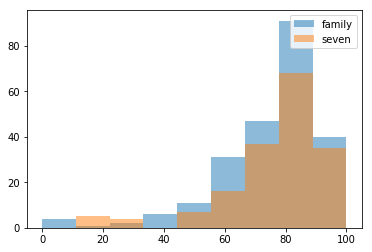

In [13]:
#比較全家跟seven的分數分布
import numpy
from matplotlib import pyplot

family = list(df_family_score.iloc[:,3])
seven = list(df_seven_score.iloc[:,3])

bins = numpy.linspace(0, 100, 10)

pyplot.hist(family, bins, alpha=0.5, label='family')
pyplot.hist(seven, bins, alpha=0.5, label='seven')
pyplot.legend(loc='upper right')
pyplot.show()

<h3>全家的商品平均分數</h3>

In [14]:
# 全家的商品平均分數
total = 0
for i in range(0,len(df_family_score)):
    score=df_family_score.iloc[i,3]
    if score is not None:
        total += score
mean_family = total//len(df_family_score)
print(mean_family)

74


<h3>7-11的商品平均分數</h3>

In [15]:
# 7-11的商品平均分數
total = 0
for i in range(0,len(df_seven_score)):
    score=df_seven_score.iloc[i,3]
    if score is not None:
        total += score
mean_seven = total//len(df_seven_score)
print(mean_seven)

76


<h3>查看全家與7-11各自抓到的"可使用文章數量" (Score不為極端值或空值)</h3>

In [16]:
#全家 可使用的文章數量(score不為極端值或空值)
len(df_family_score)

233

In [17]:
#7-11 可使用的文章數量(score不為極端值或空值)
len(df_seven_score)

172

<h2>Part3. 對全家與7-11各自"平均以上"與"及格分數(60分)以下"之商品心得進行文字分析</h2>
<h2>       (主要使用的方法為 TF-IDF 與 Word Cloud)</h2>

<h3>首先，再查看一次全家跟7-11各自的平均分數</h3>

In [18]:
# 全家的商品平均分數
total = 0
for i in range(0,len(df_family_score)):
    score=df_family_score.iloc[i,3]
    if score is not None:
        total += score
mean_family = total//len(df_family_score)
print(mean_family)

74


In [19]:
# 7-11的商品平均分數
total = 0
for i in range(0,len(df_seven_score)):
    score=df_seven_score.iloc[i,3]
    if score is not None:
        total += score
mean_seven = total//len(df_seven_score)
print(mean_seven)

76


<h3>導入Jieba與Jieba Analyse，並設定繁體字典與去除贅字</h3>

In [41]:
import jieba
import jieba.analyse

#設定繁體中文字典
jieba.set_dictionary("dict.txt.big.txt")

#設定欲移除的字詞
removes =["覺得","感覺","圖文","有點","沒有","起來","不過","這個","那個","全家","7-11","比較","現在","標示","一個"\
          ,"什麼","前幾天","真的","非常","簡單","不知","畢竟","以上","心得","參考","方面","朋友","試試","內容","這款","還是","..."
          ,"雖然","一點"]
for w in removes:
    jieba.del_word(w)


Building prefix dict from C:\Users\jaing\Desktop\dict.txt.big.txt ...
Loading model from cache C:\Users\jaing\AppData\Local\Temp\jieba.u63ab30542c4693bf6ff6b6c9485259d3.cache
Loading model cost 3.222 seconds.
Prefix dict has been built succesfully.


<h3>對全家和7-11各自分數為"平均以上"與"及格分數(60分)以下"的商品建立Data Frame</h3>

<h3>1) 找出全家商品中分數為"平均以上"的商品，並建立Data Frame</h3>

In [42]:
df_family_high = df_family_score[df_family_score["score"] > mean_family]

<h3>2) 找出全家商品中分數為"及格分數(60分)以下"的商品，並建立Data Frame</h3>

In [43]:
df_family_low = df_family_score[df_family_score["score"] < 60]

<h3>3) 找出7-11商品中分數為"平均以上"的商品，並建立Data Frame</h3>

In [44]:
df_seven_high = df_seven_score[df_seven_score["score"] > mean_seven]

<h3>4) 找出7-11商品中分數為"及格分數(60分)以下"的商品，並建立Data Frame</h3>

In [45]:
df_seven_low = df_seven_score[df_seven_score["score"] < 60]

<h3>將這四種(全家與7-11各自的"平均以上"與"60分以下")Data Frame的心得部分擷取並寫入txt檔</h3>

In [46]:
#將這四種(全家與7-11各自的"平均以上"與"60分以下")的內文部分擷取下來放進txt檔案
#以空一行的方式區分不同篇文章

content_file_family_high = open("content_family_high.txt","w+",encoding="UTF-8")
content_file_family_low = open("content_family_low.txt","w+",encoding="UTF-8")
content_file_seven_high = open("content_seven_high.txt","w+",encoding="UTF-8")
content_file_seven_low = open("content_seven_low.txt","w+",encoding="UTF-8")


for i in range(0,len(df_family_high)):
    if "span" not in str(df_family_high.iloc[i,4]):
        content_file_family_high.write(str(df_family_high.iloc[i,4]))
        content_file_family_high.write("\n"*2)
content_file_family_high.close()

for i in range(0,len(df_family_low)):
    if "span" not in str(df_family_low.iloc[i,4]):
        content_file_family_low.write(str(df_family_low.iloc[i,4]))
        content_file_family_low.write("\n"*2)
content_file_family_low.close()

for i in range(0,len(df_seven_high)):
    if "span" not in str(df_seven_high.iloc[i,4]):
        content_file_seven_high.write(str(df_seven_high.iloc[i,4]))
        content_file_seven_high.write("\n"*2)
content_file_seven_high.close()

for i in range(0,len(df_seven_low)):
    if "span" not in str(df_seven_low.iloc[i,4]):
        content_file_seven_low.write(str(df_seven_low.iloc[i,4]))
        content_file_seven_low.write("\n"*2)
content_file_seven_low.close()

<h3>對全家"平均以上"的商品進行TF-IDF分析，找出關於這些商品討論度最高的主題，而這也就是全家商品的優勢所在</h3>

In [47]:
#透過TF-IDF，取出全家"平均以上"的評論文章中"每一篇文章各自前五重要的Tags"，並寫入一個txt文檔
tag_family_high = open("tag_family_high.txt","w+",encoding="UTF-8")
with open("content_family_high.txt", "r",encoding="UTF-8") as family_high:
    for line in family_high:
        words = jieba.analyse.extract_tags(line,5)
        tag_family_high.write(",".join(words))
family_high.close()
tag_family_high.close()

In [48]:
#將上述文檔再做一次TF-IDF，取前20個Tags，代表了全家"平均以上的商品評論文章"中主要探討的主題
with open("tag_family_high.txt", "rb") as tag_family_high_total:
    for line in tag_family_high_total:
        tags = jieba.analyse.extract_tags(line,20) #取20個tags
        print(",".join(tags))
tag_family_high_total.close()

不會,單獨,喜歡,店員,XD,紅茶,口味,不錯,好吃,太甜,這樣,買來,巧克力,加熱,義大利,霜淇淋,蘋果,咖啡,因為,閱讀


<h3>對全家"60分以下"的商品進行TF-IDF分析，找出關於這些商品討論度最高的主題，而這也就是全家商品的弱勢部分</h3>

In [49]:
#透過TF-IDF，取出全家"60分以下"的評論文章中"每一篇文章各自前五重要的Tags"，並寫入一個txt文檔
tag_family_low = open("tag_family_low.txt","w+",encoding="UTF-8")
with open("content_family_low.txt", "r",encoding="UTF-8") as family_low:
    for line in family_low:
        words = jieba.analyse.extract_tags(line,5)
        tag_family_low.write(",".join(words))
family_low.close()
tag_family_low.close()

In [50]:
#將上述文檔再做一次TF-IDF，取前20個Tags，代表了全家"60分以下的商品評論文章"中主要探討的主題
with open("tag_family_low.txt", "rb") as tag_family_low_total:
    for line in tag_family_low_total:
        tags = jieba.analyse.extract_tags(line,20) #取20個tags
        print(",".join(tags))
tag_family_low_total.close()

太甜,...,奶茶,焦糖,喜歡,應該,單獨,......,一樣,起司,不會,味道,吐司,橘色,雪糕,甜得,很甜,布丁,這支,請勿


<h3>對7-11"平均以上"的商品進行TF-IDF分析，找出關於這些商品討論度最高的主題，而這也就是7-11商品的優勢所在</h3>

In [52]:
#透過TF-IDF，取出7-11"平均以上"的評論文章中"每一篇文章各自前五重要的Tags"，並寫入一個txt文檔
tag_seven_high = open("tag_seven_high.txt","w+",encoding="UTF-8")
with open("content_seven_high.txt", "r",encoding="UTF-8") as seven_high:
    for line in seven_high:
        words = jieba.analyse.extract_tags(line,5)
        tag_seven_high.write(",".join(words))
seven_high.close()
tag_seven_high.close()

In [53]:
#將上述文檔再做一次TF-IDF，取前20個Tags，代表了7-11"平均以上的商品評論文章"中主要探討的主題
with open("tag_seven_high.txt", "rb") as tag_seven_high_total:
    for line in tag_seven_high_total:
        tags = jieba.analyse.extract_tags(line,20) #取20個tags
        print(",".join(tags))
tag_seven_high_total.close()

不會,喜歡,11,個人,不錯,口味,好吃,檸檬,因為,還有,蘋果派,很甜,太甜,鮮奶,氣泡,包裝,飲料,牛奶糖,奶茶,牛奶


<h3>對7-11"60分以下"的商品進行TF-IDF分析，找出關於這些商品討論度最高的主題，而這也就是7-11商品的弱勢部分</h3>

In [54]:
#透過TF-IDF，取出7-11"60分以下"的評論文章中"每一篇文章各自前五重要的Tags"，並寫入一個txt文檔
tag_seven_low = open("tag_seven_low.txt","w+",encoding="UTF-8")
with open("content_seven_low.txt", "r",encoding="UTF-8") as seven_low:
    for line in seven_low:
        words = jieba.analyse.extract_tags(line,5)
        tag_seven_low.write(",".join(words))
seven_low.close()
tag_seven_low.close()

In [55]:
#將上述文檔再做一次TF-IDF，取前20個Tags，代表了7-11"60分以下的商品評論文章"中主要探討的主題
with open("tag_seven_low.txt", "rb") as tag_seven_low_total:
    for line in tag_seven_low_total:
        tags = jieba.analyse.extract_tags(line,20) #取20個tags
        print(",".join(tags))
tag_seven_low_total.close()

很甜,不錯,裡面,不會,檸檬,沙士,牛奶糖,淡到,很渴,太甜,一點點,麥茶,多纖,晚點,原價,條還,雞胸肉,難吃,糖漿,烏龍


<h3>由TF-IDF的結果，進一步透過Word Cloud進行分析與資料視覺化</h3>

<h3>針對全家中分數"平均以上"的商品文章製作Word Cloud</h3>

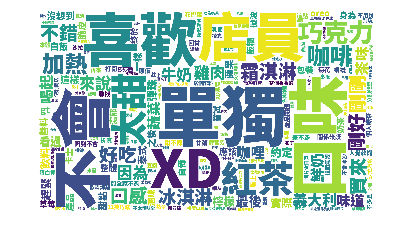

<Figure size 600x400 with 0 Axes>

In [56]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#全家中分數"平均以上"的文章的各自前五個Tags的集合
tag_family_high = open("tag_family_high.txt").read()

# 產生文字雲
wc_family_high = WordCloud(font_path="NotoSansCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 200,        #文字雲顯示最大詞數
               width = 2000,
               height = 1200,
               margin=2)      
wc_family_high.generate(tag_family_high)
# 視覺化呈現
plt.imshow(wc_family_high)
plt.axis("off")
plt.figure(dpi = 100)
plt.show()

<h3>針對全家中分數"60分以下"的商品文章製作Word Cloud</h3>

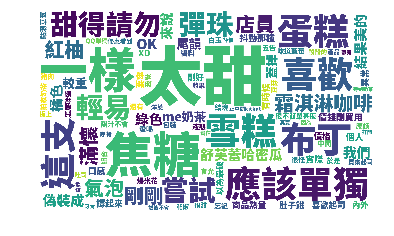

<Figure size 600x400 with 0 Axes>

In [57]:
#全家中分數"60分以下"的文章的各自前五個Tags的集合
tag_family_low = open("tag_family_low.txt").read()

# 產生文字雲
wc_family_low = WordCloud(font_path="NotoSansCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 200,        #文字雲顯示最大詞數
               width = 2000,
               height = 1200,
               margin=2)      
wc_family_low.generate(tag_family_low)
# 視覺化呈現
plt.imshow(wc_family_low)
plt.axis("off")
plt.figure(dpi = 100)
plt.show()

<h3>針對7-11中分數"平均以上"的商品文章製作Word Cloud</h3>

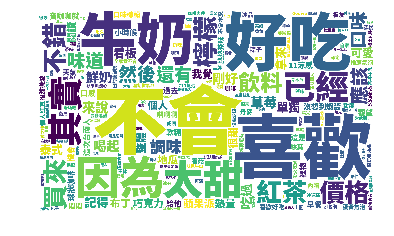

<Figure size 600x400 with 0 Axes>

In [58]:
#7-11中分數"平均以上"的文章的各自前五個Tags的集合
tag_seven_high = open("tag_seven_high.txt").read()

# 產生文字雲
wc_seven_high = WordCloud(font_path="NotoSansCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 200,        #文字雲顯示最大詞數
               width = 2000,
               height = 1200,
               margin=2)      
wc_seven_high.generate(tag_seven_high)
# 視覺化呈現
plt.imshow(wc_seven_high)
plt.axis("off")
plt.figure(dpi = 100)
plt.show()

<h3>針對7-11中分數"60分以下"的商品文章製作Word Cloud</h3>

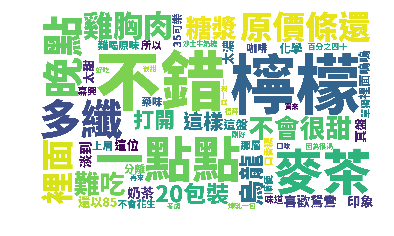

<Figure size 600x400 with 0 Axes>

In [59]:
#7-11中分數"60分以下"的文章的各自前五個Tags的集合
tag_seven_low = open("tag_seven_low.txt").read()

# 產生文字雲
wc_seven_low = WordCloud(font_path="NotoSansCJKtc-Black.otf", #設置字體
               background_color="white", #背景顏色
               max_words = 200,        #文字雲顯示最大詞數
               width = 2000,
               height = 1200,
               margin=2)      
wc_seven_low.generate(tag_seven_low)
# 視覺化呈現
plt.imshow(wc_seven_low)
plt.axis("off")
plt.figure(dpi = 100)
plt.show()